# Page Rank and HITS
### Till 02.03.2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

During with lab we will check the change of results of Page Rank and HITS algorithms with respect to the values of $\alpha$ and number of iterations.

### Task 1.

a) Firstly let's make experiment for small network (Zachary or any other small one). Set any 3 distinct values for $\alpha$, fix the number of iterations, and run Page Rank. Plot results PR values wrt $\alpha$

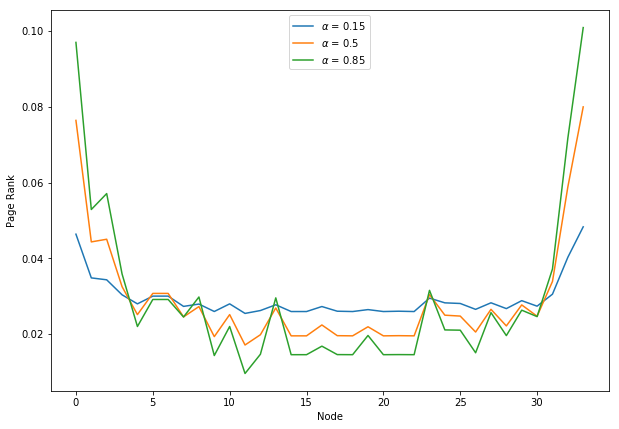

In [2]:
# Computing Page Rank with different alpha values

G = nx.karate_club_graph() # load the graph

alphas = [0.15, 0.5, 0.85] # set alpha values
PR = []                    # list for results of Page Rank
iterations = 100           # number of iterations

fig = plt.figure(1, figsize=(10,7))
ax = plt.subplot(111)
plt.xlabel('Node')
plt.ylabel('Page Rank')

for i in range(len(alphas)):
    PR.append(nx.pagerank(G, alpha = alphas[i], max_iter = iterations).values()) # compute Page Rank and append it to PR
    ax.plot(PR[i], label = '$ \\alpha $ = '+str(alphas[i]))                      # plot the computed Page Rank

legend = ax.legend(loc = 'upper center') # set up legend for the plot

We see that with smaller $\alpha$ the Page Rank distribution tends to be more constant. This is in accordance with the way the damping parameter $\alpha$ is defined, that is, with regard to a network of web pages, the probability that a random surfer will continue travelling through pages. Thus, with smaller $\alpha$ the surfer will more probably make a random jump (teleport), which destination is uniformly distributed over all pages, making the Page Rank more equal among them.

Greater $\alpha$, on the contrary, makes the Page Rank more dependent on the direct links between the nodes rather than random jumps. Therefore, nodes with more links get higher Page Rank and vice versa, making the distribution fluctuate more.

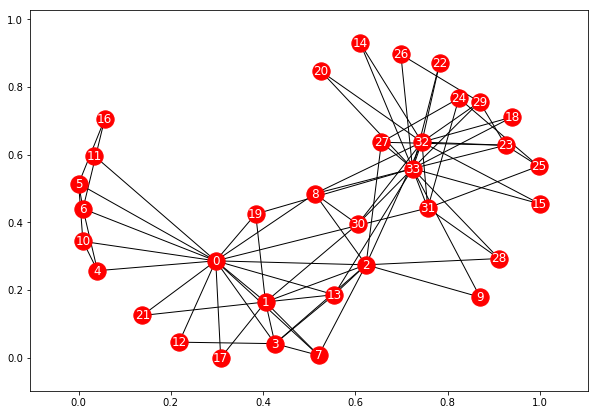

In [3]:
# Plotting the network

plt.figure(1, figsize=(10,7))
nx.draw_networkx(G, font_color = 'w')

b) Do the same for the number of iterations

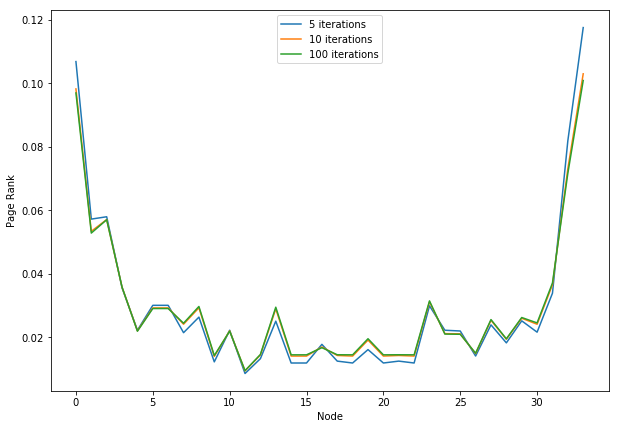

In [4]:
# Computing Page Rank with different iteration numbers

iterations = [5, 10, 100] # set iteration numbers
PR = []                   # list for results of Page Rank

fig = plt.figure(1, figsize=(10,7))
ax = plt.subplot(111)
plt.xlabel('Node')
plt.ylabel('Page Rank')

for i in range(len(iterations)):
     # set error tolerance according to number of iterations, s.t. less iterations = greater error accepted (see below)
    tolerance = 1e-06*(iterations[i]/float(max(iterations)))**(-3)
     # compute Page Rank and append it to PR (default alpha = 0.85)
    PR.append(nx.pagerank(G, max_iter = iterations[i], tol = tolerance).values())
     # plot the computed Page Rank
    ax.plot(PR[i], label = str(iterations[i])+' iterations')

legend = ax.legend(loc = 'upper center') # set up legend for the plot

Performing the same task for the number of iterations requires some manipulation of the error tolerance parameter. The way the `pagerank` function is implemented, if we use the tolerance parameter value the same with different numbers of iterations, the process converges in the same number of iterations every time, e.g. for `max_iter` = 10 and for `max_iter` = 100 the number of actual executed iterations before convergence is the same (and less than 10). That produces identical distributions of Page Rank.

Instead, we calculate the tolerance parameter explicitly for every number of iterations in such a way that it is higher for less iterations (greater error is accepted) and lower for more iterations (only small error is accepted). That way the Page Rank distributions differ, and the one with less iterations is more crude, while the one with more iterations is more accurate.

The Page Rank function here converges rapidly, and the difference is seen only at number of iterations less than 10.

c) Plot Page-Rank vs. Degree centrality

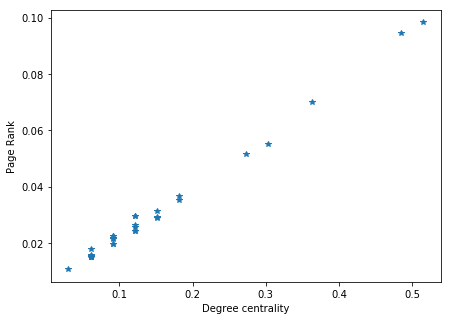

In [5]:
PR = nx.pagerank(G, alpha = 0.8).values() # computing Page Rank
dc = nx.degree_centrality(G).values()     # computing degree centrality

# plotting the results
plt.figure(1, figsize=(7,5))
plt.plot(dc, PR, '*')
plt.xlabel('Degree centrality')
plt.ylabel('Page Rank')

The two metrics are almost linearly dependent, which is not surprising since greater node degree means more links and entails higher Page Rank by formulation.

### Task 2.

Let's switch to a bigger network. Download [political blogs](http://networkdata.ics.uci.edu/data/polblogs/polblogs.gml) network. Check its basic properties. Run HITS algorithm. Try to inverstigate the top nodes.

In [6]:
G = nx.read_gml('polblogs.gml') # load the graph

In [7]:
G.is_directed() # check if the graph is directed

True

In [8]:
G.order() # number of nodes

1490

In [9]:
G.size() # number of edges

19090

In [10]:
A = nx.adjacency_matrix(G) # build adjacency matrix for the graph
P = nx.DiGraph(A)          # create a directed graph from the matrix

In [11]:
(h, a) = nx.hits(P) # HITS algorithm, returns two-tuple of dicts (hubs, authorities)
a = a.values()      # authorities values
h = h.values()      # hubs values

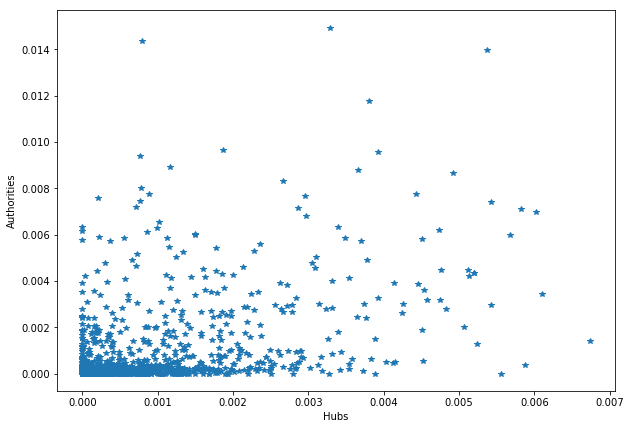

In [12]:
# plotting the results

plt.figure(1, figsize=(10,7))
plt.plot(h, a, '*')
plt.xlabel('Hubs')
plt.ylabel('Authorities')

In [13]:
# finding the node with the highest authority value

idx = np.argsort(a) # list of indices that would sort list a
idx[-1]             # index of the highest authority avalue

154

In [14]:
# checking the node attributes

G.node[idx[-1]]

{'id': 154,
 'label': u'dailyhowler.com',
 'source': u'LeftyDirectory',
 'value': 0}

Vizualize top Authorities colored in blue with sizes proportional to A-value and their Common Hubs coloured in green with size proportional to H-value.

In [15]:
top_a = 2 # number of top authorities to visualize; 2 is the largest number of top authorities that all have common hubs

In [16]:
top_list = list(idx[-top_a:]) # list of nodes representing top authorities

In [17]:
B = G.subgraph(top_list) # subgraph of top authorities

In [18]:
# finding common hubs
ch = []
common = True
for ng in G:
    common = True
    for nb in B:
        if not (ng, nb) in G.edges():
            common = False
            break
    if common:
        ch.append(ng)

In [19]:
len(ch) # number of common hubs

13

In [20]:
TopAuth = nx.DiGraph() # graph of top authorities and their common hubs

In [21]:
# adding edges from common hubs to top authorities

for c in ch:
    for nb in B:
        TopAuth.add_edge(c, nb)
        
# adding edges between top authorities if they exist
        
for (b1, b2) in B.edges():
    TopAuth.add_edge(b1, b2)

In [22]:
min_a = min(list(a[x] for x in B.nodes())) # minimal value of authority among top authorities
min_a

0.014363078116840228

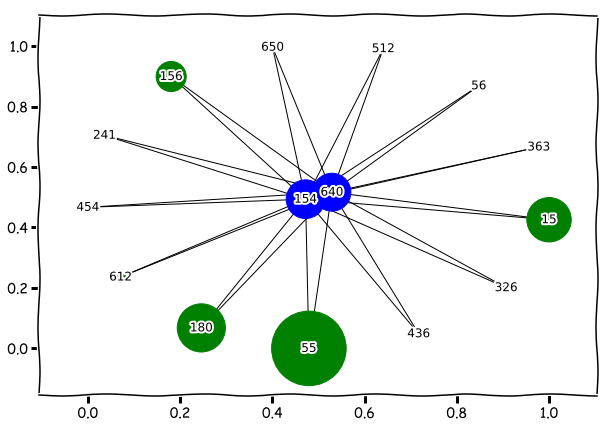

In [23]:
# plotting the graph of top authorities and their common hubs

plt.xkcd()
plt.figure(1, figsize=(10,7))
nx.draw_networkx(TopAuth,
                 arrows = False,
                  # assign size to a node according to its hub value if its authority is less than min_a
                  # (it's a common hub), or according to authority value otherwise (it's a top authority),
                  # while also multiplying by a power of 10
                 node_size  = [h[x]*10**6 if a[x] < min_a else a[x]*10**5 for x in TopAuth.nodes()],
                  # similarly assign color to nodes
                 node_color = ['g' if a[x] < min_a else 'b' for x in TopAuth.nodes()]
                )

We can see that both top 2 authorities have authority values of the same order, while their common hubs have nodes 55, 180, 15 and 156 siginificantly more valuable in terms of hub values.